In [6]:
# DEFINITION OF LIBRARIES
# ------------------------------------------------
import re
import os
import math
import spacy
import numpy as np
import pandas as pd
import seaborn as sb

# DEFINITION OF PROPRIETARY LIBRARIES 
# ------------------------------------------------
from py_machine_learning import agrupador
from py_utilities import studentsIdentifier, columnsIdentifier
from py_utilities import outputFilesIdentifier, writeHierarchicalCSV, clearOutputCSV, mkdirOutputFolder
from py_utilities import get_printador, get_printador_cab, get_migracao
from py_preprocessing import load_file, clear_dir, write_file, write_csv
from py_preprocessing import mapear_dir_raiz, read_code, write_join
from py_preprocessing import join_tasks, removeLineComment, removeBlockComment
%run PY_extrator.ipynb

## CONSTANTS: PATH SETTINGS
## ------------------------------
ROOT_INPUT = "db-input"
ROOT_OUTPUT = "db-output"
ROOT_TREE = "images/"
OUTPUT_FILE = "csv-output-extrator.csv"

## CONSTANTS: CLUSTERING SETTINGS
## ------------------------------
METRIC = "euclidean"
METHOD = "average"

## CONSTANTS: INPUT SETTINGS
## ------------------------------
LS_TYPES = ['void', 'int', 'long', 'float', 'double', 'char']

## CONSTANTS: LEARNING TOPICS
## ------------------------------
T1 = "Lista01"
T2 = "Lista02"
T3 = "Lista03"
T4 = "Lista04"
T5 = "Lista05"

## CONSTANTS: CLASSROOM
## ------------------------------
C1 = "T1"
C2 = "T2"
C3 = "T3"

In [7]:
def initFeatures(lista):
    features = {}
    
    if lista == T1:                        
        features = set_list01()
    
    elif lista == T2:
        features = set_list02()

    elif lista == T3:            
        features = set_list03()

    elif lista == T4:                
        features = set_list04()
                    
    elif lista == T5:                
        features = set_list05()
        
    return features

In [8]:
def getFeatures(features, lista, codigo, ls_calls, ls_functions, ls_func_call, ls_types):
                
    if lista == T1:
        features = get_list01(features, codigo, ls_calls, ls_types)
        
    elif lista == T2:
        features = get_list02(features, codigo, ls_functions, ls_calls, ls_func_call, ls_types)
    
    elif lista == T3:
        features = get_list03(features, codigo)
    
    elif lista == T4:
        features = get_list04(features, codigo, ls_functions)
    
    elif lista == T5:
        features = get_list05(features, codigo)
    
    return features

In [9]:
# MAIN FUNCTION
# ------------------------------------------------
def main(classroom=C1, lista=T1, printador=False, num_clusters=4):
    
    clearOutputCSV(OUTPUT_FILE)
    # -------------------------------------------------------------------------------
    # (ls_dataset): armazena um dicionário com as features e seus valores 
    ls_dataset = []
            
    # files settings
    input_folder, output_folder, output_tree, output_cluster = outputFilesIdentifier(ROOT_INPUT, ROOT_OUTPUT, classroom, lista, ROOT_TREE)

    # create output folder if do not exist
    mkdirOutputFolder(output_folder)
            
    # join every source code solutions
    ls_todos_codigos, ls_name_files = join_tasks(input_folder, output_folder, True)

    # -------------------------------------------------------------------------------
    # OUTPUT: ls_todos_codigos: [[[cod1-joao], [cod2-joao]], [[cod1-maria], [cod2-maria]]]
    for id_aluno, (codigos_aluno, name_codes) in enumerate(zip(ls_todos_codigos, ls_name_files)):
        
        # O id de aluno inicia em 1
        id_aluno += 1
        
        features = {}             
        features = initFeatures(lista)
 
        ##-------------------------------------------------------------------------------                
        if (printador):
            get_printador_cab(id_aluno)
            print("n. of source codes: {}".format(len(codigos_aluno)))
                    
        ##-------------------------------------------------------------------------------
        ## EXTRATOR
        for id_cod, (codigo, name_code) in enumerate(zip(codigos_aluno, name_codes)):
            
            codigo = removeBlockComment(codigo)
            codigo = removeLineComment(codigo)
            
            ## Extraction of the main resources that will be used in subsequent features
            ##-------------------------------------------------------------------------------                     
            ls_signatures, ls_flags = get_signatures(codigo, LS_TYPES)
            ls_functions = get_functions(codigo, LS_TYPES)
            ls_calls = get_calls(codigo, LS_TYPES)
            ls_func_call = get_func_call(codigo, ls_flags, LS_TYPES)
            ##-------------------------------------------------------------------------------    

            features = getFeatures(features, lista, codigo, ls_calls, ls_functions, ls_func_call, LS_TYPES)
            
            if lista == T1:                 
                ls_libs = get_calls_libs(codigo, name_codes)
                if not ls_libs == "":
                    for (c, n) in zip(codigos_aluno, name_codes):
                        if ls_libs in n:
                            ls_signatures, ls_flags = get_signatures(c, LS_TYPES)
                            features['NC'] += len(get_calls(codigo, LS_TYPES))
                            break
                
        ##-------------------------------------------------------------------------------
        dict_list = {}
        dict_list.update(features)                   

        ##-------------------------------------------------------------------------------                
        if (printador):
            get_printador(dict_list)                    
     
        ls_dataset.append(dict_list)
                   
    # -------------------------------------------------------------------------------        
    # EXTRATOR        
    df = pd.DataFrame(ls_dataset)
    features_cols = df.keys()
            
    # students id (eg.: 101, 201 or 301)
    start_stud = studentsIdentifier(classroom)
            
    # get clustering
    df, dfx, c = agrupador(df, features_cols, start_stud, output_cluster, num_clusters, METRIC, METHOD)            

    # columns name (eg.: NF, FLC, NP, etc)
    column_names = columnsIdentifier(lista)
    print("\n>>> EXTRACTED FEATURES: \n{}".format(column_names))
            
    # write CSV results
    writeHierarchicalCSV(df, column_names, OUTPUT_FILE, dfx)
        
    return (ls_dataset)




> Folder: db-output_T1_Lista01 (ok).
0-01: ['codigoVazio.c']
1-02: ['L1EX01.c', 'L1EX02.c', 'L1EX03.c', 'L1EX04.c']
2-03: ['L1EX01.c', 'L1EX02.c', 'L1EX03.c', 'L1EX04.c', 'L1EX05.c', 'L1EX06.c', 'veiculo.c']
3-04: ['L1EX01.c', 'L1EX02.c', 'L1EX03.c', 'L1EX04.c', 'L1EX05.c', 'veiculo.c']
4-05: ['L1EX01.c', 'L1EX02.c', 'L1EX03.c', 'L1EX04.c', 'L1EX05.c', 'L1EX06.c', 'L1EX06F.c', 'veiculo.c']
5-06: ['codigoVazio.c']
6-07: ['L1EX01.c', 'L1EX02.c', 'L1EX03.c', 'L1EX04.c', 'L1EX05.c', 'L1EX06.c', 'veiculo.c']
7-08: ['L1EX01.c', 'L1EX02.c', 'L1EX03.c', 'L1EX04.c', 'L1EX05.c', 'L1EX06.c']
8-09: ['L1EX01.c', 'L1EX02.c', 'L1EX03.H', 'L1EX03.c', 'L1EX04.C']
9-10: ['L1EX01.c', 'L1EX02.c', 'L1EX03.c', 'L1EX04.c', 'L1EX05.c', 'L1EX06.c', 'veiculo.c']
10-11: ['L1EX01.C', 'L1EX02.C', 'L1EX03.C', 'L1EX04.C', 'L1EX05.C', 'L1EX06.c', 'veiculo.c']
11-12: ['L1EX01.c', 'L1EX02.c', 'L1EX03.c', 'L1EX04.c', 'L1EX05.c', 'L1EX06.c', 'veiculo.h']
12-13: ['codigoVazio.c']
13-14: ['L1EX01.c', 'L1EX02.c', 'L1EX03.c

NameError: name 'T1' is not defined

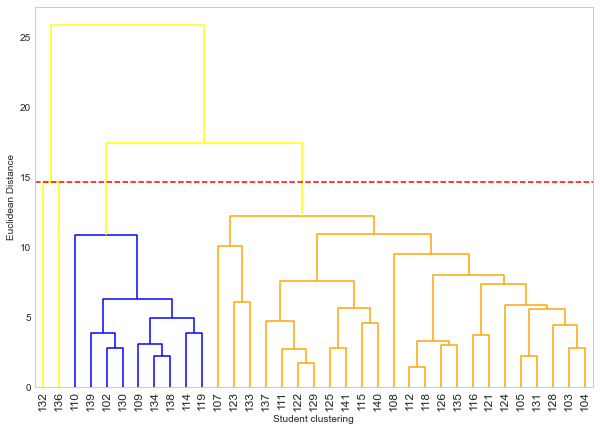

In [10]:
# SCRIPT TO RUN MULTIPLE CLASSROONS AND LISTS
# ------------------------------------------------
def scriptExec(printador=False):
    #ls_turmas = {C1 , C2, C3}
    ls_turmas = {C1}
    ls_listas = {T1, T2, T3, T4, T5}
    
    for turma in sorted(ls_turmas):
        for lista in sorted(ls_listas):
            main(turma, lista, printador)
        break

# RUN MULTIPLE LISTS
# ------------------------------------------------            
#scriptExec()

# RUN ONLY ONE LIST
# ------------------------------------------------  
ls_dataset = main(C1, T1)